In [51]:
from codecs import open
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, multilabel_confusion_matrix
import scikitplot as skplt

import seaborn as sns
from __future__ import division
from sklearn.model_selection import cross_val_score


In [6]:
def read_documents(doc_file):
  docs = []
  labels = []
  with open(doc_file, 'r', encoding='utf-8') as f:
    for line in f:
      words = line.strip().split()
      if len(words) > 3:
        docs.append(words[3:])
        labels.append(words[1])
  return docs, labels

In [7]:
docs, labels = read_documents('all_sentiment_shuffled.txt')

In [8]:
docs

[['i',
  'bought',
  'this',
  'album',
  'because',
  'i',
  'loved',
  'the',
  'title',
  'song',
  '.',
  'it',
  "'s",
  'such',
  'a',
  'great',
  'song',
  ',',
  'how',
  'bad',
  'can',
  'the',
  'rest',
  'of',
  'the',
  'album',
  'be',
  ',',
  'right',
  '?',
  'well',
  ',',
  'the',
  'rest',
  'of',
  'the',
  'songs',
  'are',
  'just',
  'filler',
  'and',
  'are',
  "n't",
  'worth',
  'the',
  'money',
  'i',
  'paid',
  'for',
  'this',
  '.',
  'it',
  "'s",
  'either',
  'shameless',
  'bubblegum',
  'or',
  'oversentimentalized',
  'depressing',
  'tripe',
  '.',
  'kenny',
  'chesney',
  'is',
  'a',
  'popular',
  'artist',
  'and',
  'as',
  'a',
  'result',
  'he',
  'is',
  'in',
  'the',
  'cookie',
  'cutter',
  'category',
  'of',
  'the',
  'nashville',
  'music',
  'scene',
  '.',
  'he',
  "'s",
  'gotta',
  'pump',
  'out',
  'the',
  'albums',
  'so',
  'the',
  'record',
  'company',
  'can',
  'keep',
  'lining',
  'their',
  'pockets',
  'whil

In [15]:
def docsToText(docs):
  texts =[]
  for doc in docs:
    str = ""
    for element in doc:
      string = " "+element
      str += string
    texts.append(str)
  return texts
    

In [16]:
texts = docsToText(docs)

In [17]:
texts

[" i bought this album because i loved the title song . it 's such a great song , how bad can the rest of the album be , right ? well , the rest of the songs are just filler and are n't worth the money i paid for this . it 's either shameless bubblegum or oversentimentalized depressing tripe . kenny chesney is a popular artist and as a result he is in the cookie cutter category of the nashville music scene . he 's gotta pump out the albums so the record company can keep lining their pockets while the suckers out there keep buying this garbage to perpetuate more garbage coming out of that town . i 'll get down off my soapbox now . but country music really needs to get back to it 's roots and stop this pop nonsense . what country music really is and what it is considered to be by mainstream are two different things . \\",
 ' i was misled and thought i was buying the entire cd and it contains one song \\',
 " i have introduced many of my ell , high school students to lois lowery and the d

In [21]:
# Converting the texts and labels into a dataframe
import pandas as pd

tempdict = {'Text':texts, 'Sentiment': labels}
df = pd.DataFrame(tempdict)

In [22]:
df

,Text,Sentiment
0,i bought this album because i loved the title...,neg
1,i was misled and thought i was buying the ent...,neg
2,"i have introduced many of my ell , high schoo...",neg
3,anything you purchase in the left behind seri...,pos
4,"i loved these movies , and i cant wiat for th...",pos
...,...,...
11909,the story here dose n't matter . the main cha...,neg
11910,i liked everything about this product except ...,pos
11911,this flash is the perfect back-up for a studi...,pos
11912,i had boughten this as a gift which turned ou...,neg


In [47]:
# Transforming the sentiment labels to numerica values
data = df.copy()
data['Sentiment'] = data['Sentiment'].map({'pos':1, 'neg':0})
data.head()

,Text,Sentiment
0,i bought this album because i loved the title...,0
1,i was misled and thought i was buying the ent...,0
2,"i have introduced many of my ell , high schoo...",0
3,anything you purchase in the left behind seri...,1
4,"i loved these movies , and i cant wiat for th...",1


Text(0, 0.5, 'Labels')

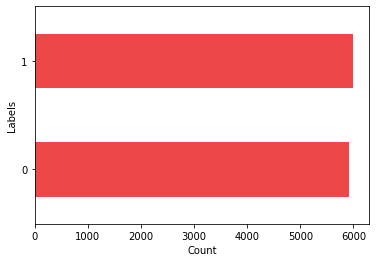

In [26]:
# EDA
# Checking the label distribution
ax = data.Sentiment.value_counts(sort=False).plot(kind='barh', color='#EE4747')
ax.set_xlabel('Count')
ax.set_ylabel('Labels')

In [28]:
# Add lenth of text column to the dataframe
data['len'] = data['Text'].str.len() # Store string length of each sample
data = data.sort_values(['len'], ascending=True)
data = data.dropna()
data.head(10) 

,Text,Sentiment,len
11471,goo \,1,6
4976,terrib \,0,9
1289,2nd time . \,0,13
1190,it 's a beu \,1,14
6863,you all like misogynist comics \,0,33
10716,all i have to say is great album \,1,35
10890,it 's not great music to dance to \,0,36
1972,"stick to singing in spanish , shak \",1,37
1751,all i can say is you must try this ! \,1,39
11656,received qickly and in great condition \,1,41


In [29]:
train_data = data.sample(frac=0.8)

In [30]:
train_data

,Text,Sentiment,len
5081,i bought this monopod about 3 weeks ago after...,0,1071
1870,"i am a huge thomas hardy fan , and i was not ...",1,1160
7773,daughter was very pleased when she received i...,1,218
851,it 's just too complex compared to print shop...,0,122
7681,i use corel draw x3 everyday for designing lo...,1,349
...,...,...,...
11498,"if i could give it 0 star , i would . my humb...",0,517
6747,perhaps these other people had bought the pro...,0,296
6924,it ' curious how an interesting history can b...,0,246
4512,this is the worst thing i have ever bought . ...,0,347


In [31]:
test_data = data.sample(frac=0.2)

In [32]:
test_data

,Text,Sentiment,len
8892,i upgraded from the canon digital rebel ( gre...,1,337
11389,i saw dead ringers in the movies . the theate...,0,282
1192,"goth meets cabaret , or rather gothic music i...",1,1211
9579,i have been using paperport since it came fro...,0,690
2855,"this book is very dissapointing . sure , this...",0,623
...,...,...,...
4826,growing up with classical rock and having enj...,1,421
10511,the leather is very soft and the case is simp...,1,105
3019,i do n't know why most of the reviews are so ...,1,1038
3998,this workout is nice because it does n't mess...,1,580


In [48]:
# Sentiment classifier using NaiveBayes
naive_bayes_pipeline = Pipeline([
                ('count', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('gnb', MultinomialNB()),
                ])

In [49]:
# Train model using the created sklearn pipeline
naive_bayes_classifier = naive_bayes_pipeline.fit(train_data['Text'], train_data['Sentiment'])

In [56]:
# Predict class labels using the learner function
test_data['Pred'] = naive_bayes_classifier.predict(test_data['Text'])
y_actual= test_data['Sentiment']
y_pred = test_data['Pred']
target_labels = ['negative', 'positive']

              precision    recall  f1-score      support
negative       0.886345  0.940156  0.912458  1153.000000
positive       0.940517  0.886992  0.912971  1230.000000
accuracy       0.912715  0.912715  0.912715     0.912715
macro avg      0.913431  0.913574  0.912714  2383.000000
weighted avg   0.914306  0.912715  0.912723  2383.000000


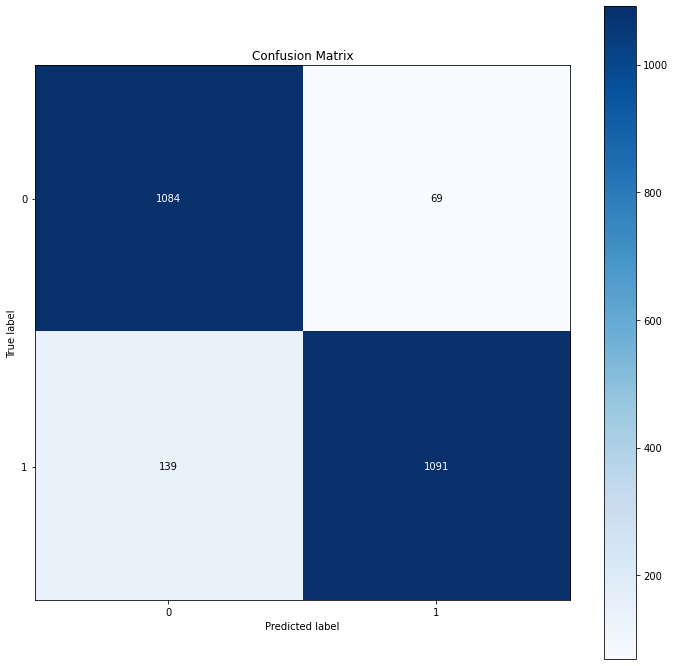

In [58]:
# Confusion Matrix
naive_bayes_results = classification_report(y_actual, y_pred, target_names=target_labels, output_dict=True)
results_df = pd.DataFrame(naive_bayes_results).transpose()
print(results_df)
skplt.metrics.plot_confusion_matrix(y_actual, y_pred, figsize=(12,12))

In [63]:
def cross_val(params, model, X_train, y_train):
    model = model

    cv_results = cross_val_score(model, X_train, y_train,
                             cv = 10, #10 folds
                             scoring = "accuracy",
                             verbose = 2
                            )
    #return the mean of the 10 fold cross validation
    return cv_results.mean()

#baseline parameters
params = {
          "priors" : "None",
          "var_smoothing" : 1e-9
}
#create an list of var_smoothing to cross validate
steps = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4]

#will contain the cv results
results = []
for step in steps:        
    params["var_smoothing"] = step        
    cv_result = cross_val(params, naive_bayes_classifier, train_data['Text'], train_data['Sentiment'])

    #save result
    results.append(cv_result)

#print results
#convert results to pandas dataframe for easier visualization
df = pd.DataFrame({"var_smoothing" : steps, "accuracy" : results})
#sort it
df_sorted = df.sort_values("accuracy", ascending=False)
#reset the index of the sorted dataframe
df_sorted.reset_index(inplace=True, drop=True)
df_sorted.head()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   1.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   1.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   1.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   1.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.6s finished


,var_smoothing,accuracy
0,1.000000e-08,0.825832
1,1.000000e-07,0.825832
2,1.000000e-06,0.825832
3,1.000000e-05,0.825832
4,1.000000e-04,0.825832
